In [1]:
from __future__ import print_function

In [2]:
__author__ = 'fbb'

In [3]:
import pylab as pl
import numpy as np
import pandas as pd

import statsmodels as sm
import os
import json
s = json.load(open(os.getenv('PUI2015')+'/fbb_matplotlibrc.json'));
pl.rcParams.update(s)
print (s)
newparams = {
  "axes.facecolor": '#FFFFFF',
  "lines.linewidth": 2.0,
  "axes.edgecolor": "#aaaaaa",
  "patch.linewidth": 1.0,
  "legend.fancybox": 'false',
  "axes.facecolor": "#ffffff",
  "axes.labelsize": "large",
  "axes.grid": 'false',
  "patch.edgecolor": "#555555",
  "axes.titlesize": "x-large",
  "svg.embed_char_paths": "path",
}
pl.rcParams.update(newparams)
%pylab inline

{u'lines.linewidth': 2.0, u'axes.edgecolor': u'#bcbcbc', u'legend.fontsize': u'medium', u'patch.linewidth': 1.0, u'legend.fancybox': False, u'axes.color_cycle': [u'SteelBlue', u'IndianRed', u'Green', u'DarkOrange', u'MediumTurquoise', u'gold', u'#E24A33'], u'font.size': 15, u'axes.facecolor': u'#FFF8F0', u'axes.labelsize': u'large', u'axes.grid': True, u'patch.edgecolor': u'#ffffff', u'axes.titlesize': u'x-large', u'examples.directory': u'', u'svg.embed_char_paths': u'path'}
Populating the interactive namespace from numpy and matplotlib


//anaconda/envs/p2nb/lib/python2.7/site-packages/matplotlib-2.0.0b4+2344.g7b27a1b-py2.7-macosx-10.6-x86_64.egg/matplotlib/__init__.py:910: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
//anaconda/envs/p2nb/lib/python2.7/site-packages/matplotlib-2.0.0b4+2344.g7b27a1b-py2.7-macosx-10.6-x86_64.egg/matplotlib/__init__.py:910: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# A better package to plot scatter matrices 
# corner https://github.com/dfm/corner.py

making some synthetic data by concatenating 5 sets of 2 gaussian distributions with different mean and stdev 

In [4]:
ndim, nsamples = 5, 10000
samples = np.zeros([ndim, nsamples])
for i in range(ndim):
    samples[i] = np.concatenate(
        [np.random.randn(nsamples/2),(np.random.randn(nsamples/2)+(i+1))/(5-i)])
print (samples)
data = pd.DataFrame(samples.T)
data.head()

[[  1.38800607e+00  -2.10756354e+00  -9.05648166e-01 ...,  -2.06642745e-01
    4.96812764e-03   7.60236306e-02]
 [ -1.98040085e+00   9.82807056e-01   1.10786376e-01 ...,   4.98129255e-01
    8.13181018e-01   6.36928428e-01]
 [  1.22722768e+00  -1.20089066e-01  -4.20363150e-01 ...,   9.09087623e-01
    8.54660132e-01   9.10540409e-01]
 [  1.80244755e+00   7.93635585e-01   2.00570742e-01 ...,   1.94004193e+00
    1.88635691e+00   1.94530209e+00]
 [  4.08701137e-01  -1.26097529e+00   1.71182162e-01 ...,   4.34600440e+00
    3.64403379e+00   4.98378171e+00]]


,0,1,2,3,4
0,1.388006,-1.980401,1.227228,1.802448,0.408701
1,-2.107564,0.982807,-0.120089,0.793636,-1.260975
2,-0.905648,0.110786,-0.420363,0.200571,0.171182
3,0.279492,-1.633023,-0.378678,0.578093,1.111762
4,0.581665,-0.292452,-0.467377,2.272480,-0.702148


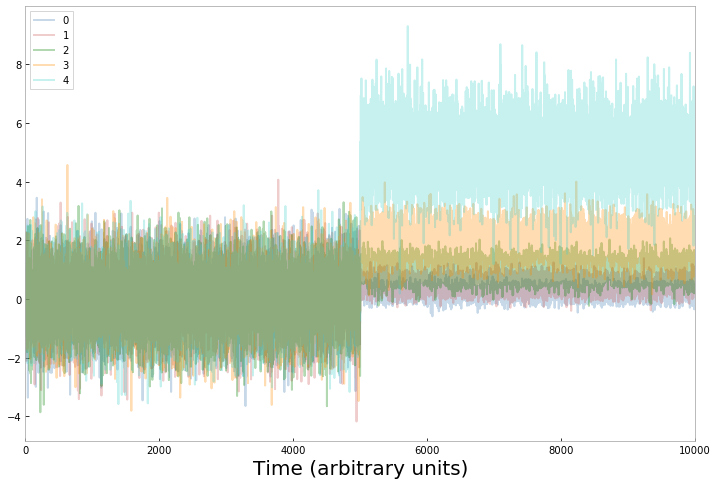

In [5]:
data.plot(figsize=(12,8), alpha=0.3);
pl.xlabel("Time (arbitrary units)", fontsize=20)
pl.show()

# the pandas scatter matrix

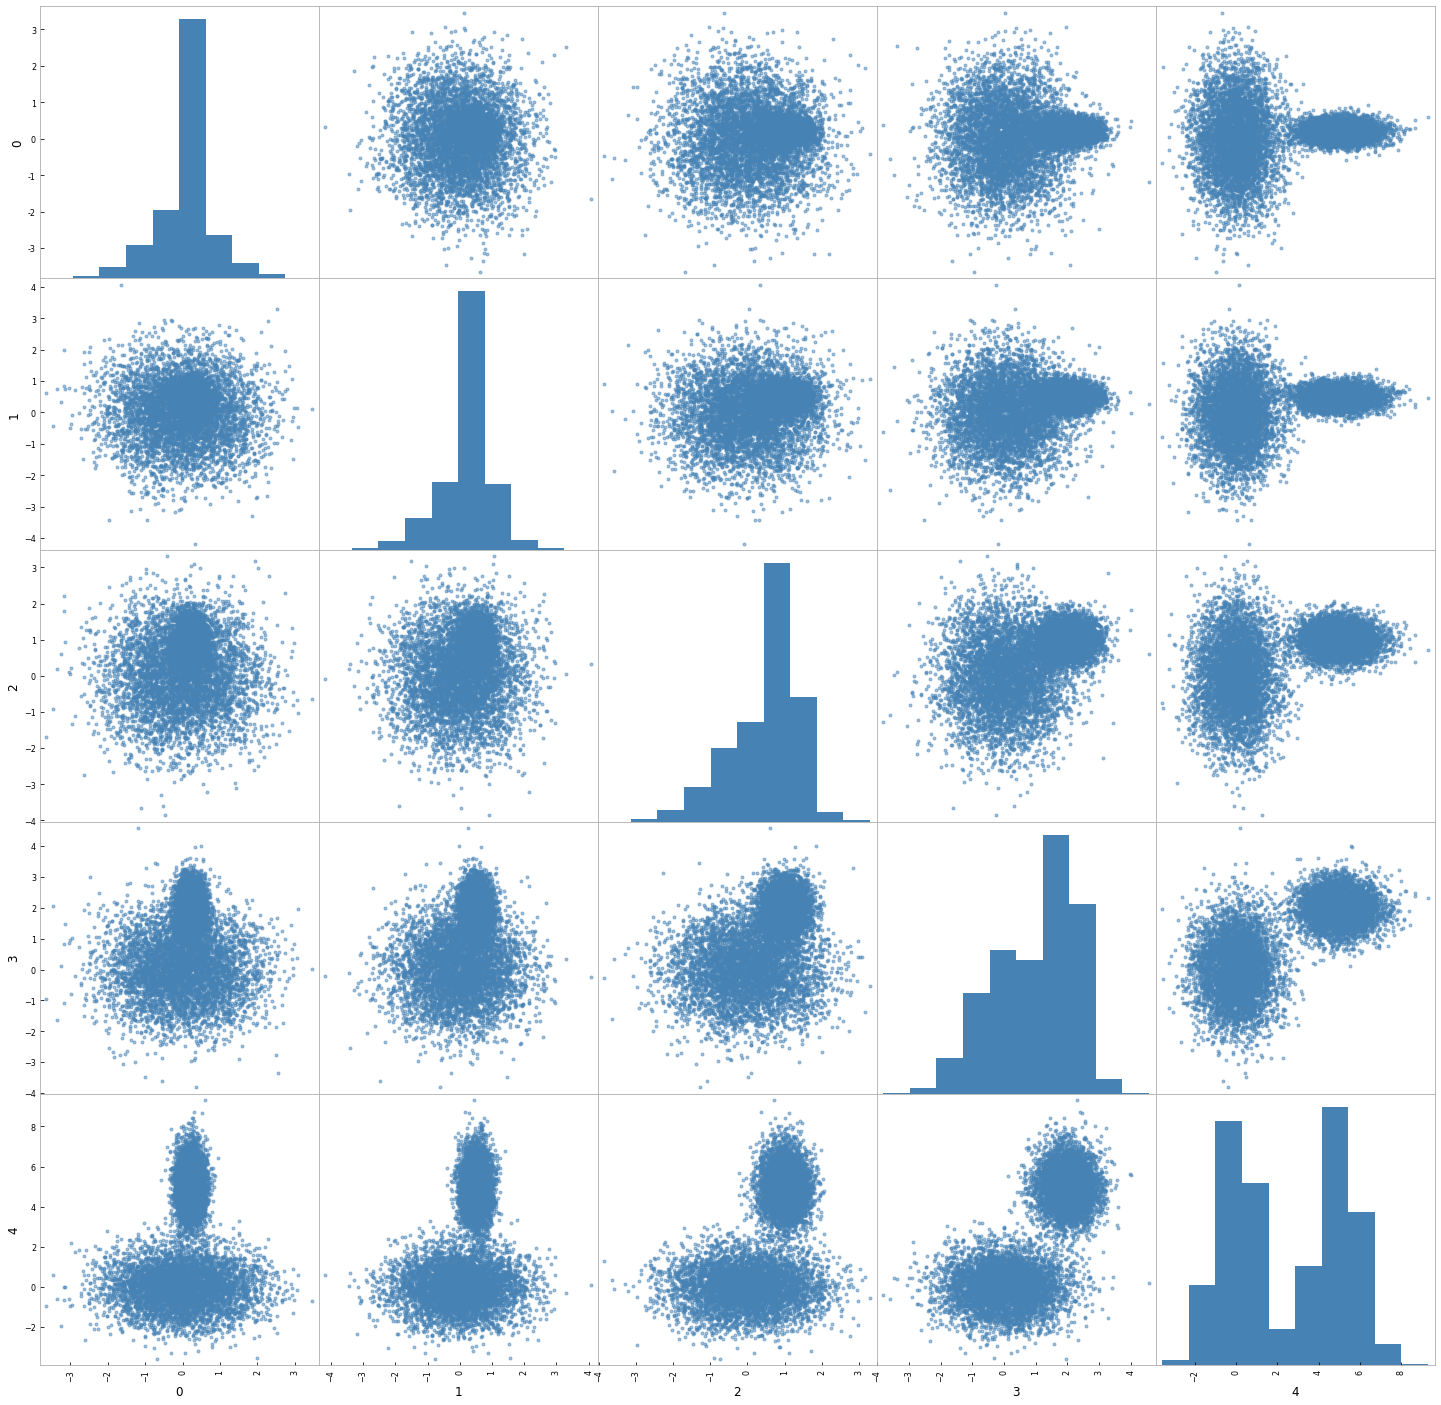

In [6]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, figsize=(25,25))
pl.show()

# the corner.py scatter matrix

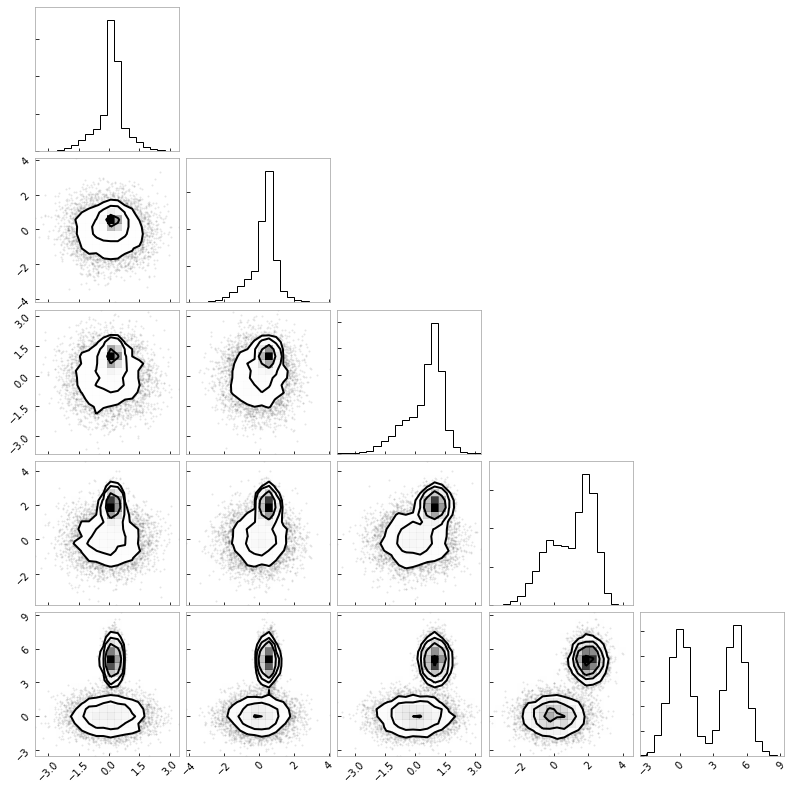

In [7]:
import corner

figure = corner.corner(samples.T)
figure.savefig("corner.png")
pl.show()

* remove redundancy: the matrix is symmetric fo the triangle above the diagonal is redundant with the triangle below)
* remove clutter by data reduction: where the points are so dense that the distribution cannot be appreciated substitute the points with contour lines that show the distribution
* remove unnecessary color: at this stage the color is not conveying any information. by removing color here we can use it to communicate non redundant information (as below)

# corner plot with median value markes (in color), confidence intervals, variable median and 1std values markes, and axes labels

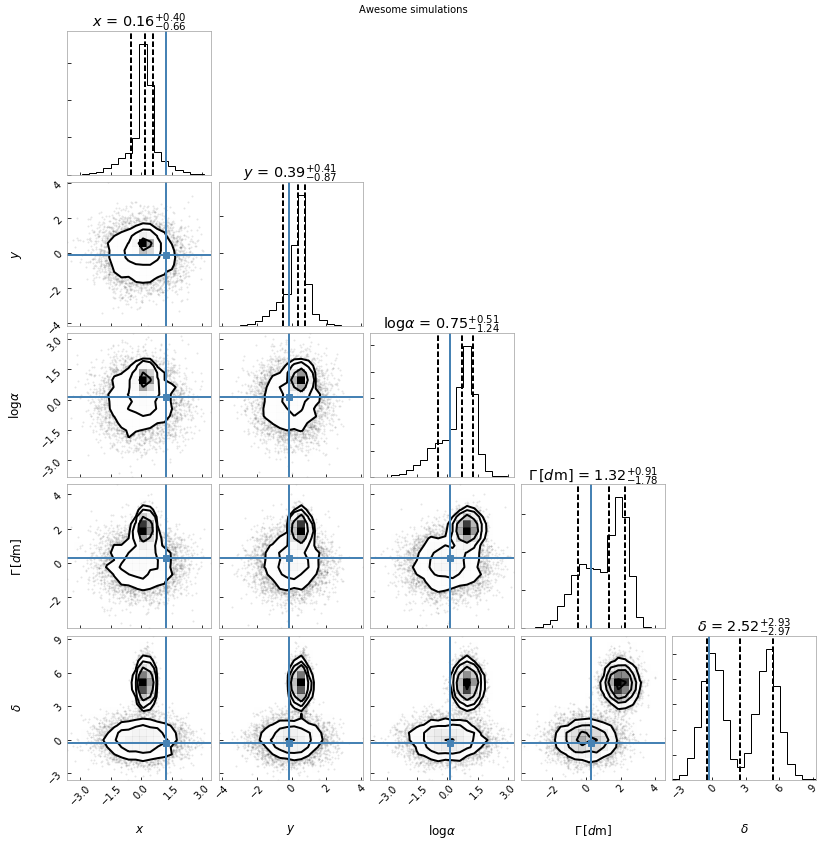

In [8]:
figure = corner.corner(samples.T, labels=[r"$x$", r"$y$", r"$\log \alpha$",
                                     "$\Gamma \, [d\mathrm{m}]$", r"$\delta$"],
                         truths=[np.median(s) for s in samples.T],
                         quantiles=[0.16, 0.5, 0.84],
                         show_titles=True, title_args={"fontsize": 20}, figsize=(20,20))
figure.gca().annotate("Awesome simulations", xy=(0.5, 1.0), xycoords="figure fraction",
                      xytext=(0, -5), textcoords="offset points",
                      ha="center", va="top")
pl.show()